# Finding the most efficient size for the Rear blocker of a 10-shell FOXSI rocket optics module

## @Milo
## February, 2018

The rays are generated using the python script at ***Milo_RayTracing/blockers/rays_Rblockers.py*** and saved in the folder ***Milo_RayTracing/blockers/rays_RB/***.

In [16]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 

rbrs = np.arange(0.0,2.805,0.2) # Rear blocker radii

All_Drays, All_Hrays, All_Prays = [], [], []
All_Dx, All_Dy, All_Hx, All_Hy, All_Px, All_Py = [], [], [], [], [], []

for rbr in rbrs:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_RB/rays_RBR_=_'+str(rbr)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    All_Drays.append(Drays)
    All_Hrays.append(Hrays)
    All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    All_Hx.append(Hx)
    All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    All_Px.append(Px)
    All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    All_Dx.append(Dx)
    All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_RB/rays_RBR_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_RB/rays_RBR_=_0.2.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_RB/rays_RBR_=_0.4.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_RB/rays_RBR_=_0.6.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_RB/rays_RBR_=_0.8.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_RB/rays_RBR_=_1.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_RB/rays_RBR_=_1.2.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_RB/rays_RBR_=_1.4.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_RB/rays_RBR_=_1.6.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/bloc

### Plot Rays vs Rear size blocker for a set FB radius of 3.17cm

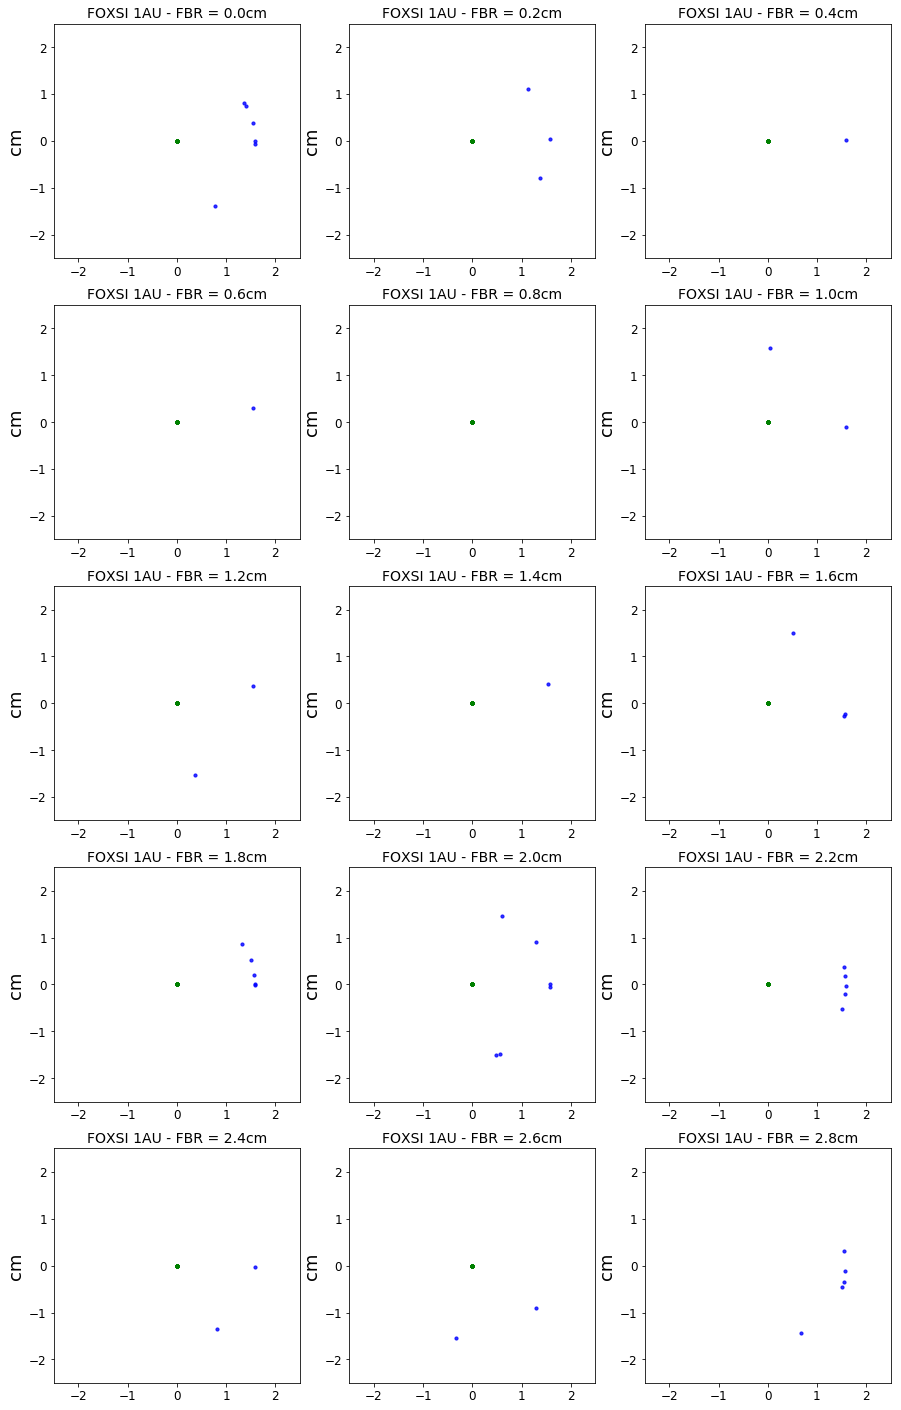

In [17]:
fig = plt.figure(figsize=(15,25))
for i, rbr in enumerate(rbrs):
    plt.subplot(5,3,i+1)
    plt.title('FOXSI 1AU - FBR = '+str(rbr)+'cm',fontsize=14)
    plt.ylabel('cm',fontsize=18)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.scatter(All_Hx[i],All_Hy[i],color='red',s=10.,alpha=0.8)
    plt.scatter(All_Px[i],All_Py[i],color='blue',s=10.,alpha=0.8)
    plt.scatter(All_Dx[i],All_Dy[i],color='green',s=10.,alpha=0.8)
    plt.ylim(-2.5,2.5)
    plt.xlim(-2.5,2.5)
plt.show()

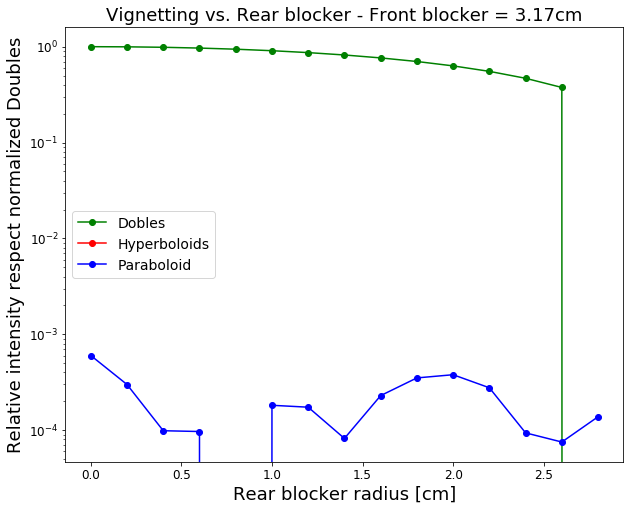

In [21]:
Rout = 3.29
Doubles, Hyp, Par = [], [], []
for i, rbr in enumerate(rbrs):
    Doubles.append(len(All_Drays[i]) * (Rout**2 - rbr**2))
    Hyp.append(len(All_Hrays[i]) * (Rout**2 - rbr**2))
    Par.append(len(All_Prays[i]) * (Rout**2 - rbr**2))

# Plotting :
fig = plt.figure(figsize=(10,8))
plt.title('Vignetting vs. Rear blocker - Front blocker = 3.17cm',fontsize=18)
plt.semilogy(rbrs, Doubles/max(Doubles),'go-',label='Dobles')
plt.semilogy(rbrs, Hyp/max(Doubles),'ro-',label='Hyperboloids')
plt.semilogy(rbrs, Par/max(Doubles),'bo-',label='Paraboloid')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Rear blocker radius [cm]',fontsize=18)
#plt.axvline(3.17,color='purple',linestyle='--',lw=0.8)
#plt.text(3.155,5e-1,'Most efficient front blocker size = 3.17cm',rotation=90,fontsize=12,color='purple')
plt.legend(fontsize=14)
plt.show()